In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [2]:
con = sqlite3.connect('database.sqlite')

In [3]:
filtered_data=pd.read_sql_query("""Select * FROM Reviews WHERE Score !=3 LIMIT 5000 """,con)

In [4]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
def partition(x):
    if x<3:
        return 0
    return 1
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition)
filtered_data['Score'] = positiveNegative

In [6]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
sorted_data=filtered_data.sort_values('ProductId',axis=0,ascending=True,kind='quicksort', na_position='last')

In [8]:
sorted_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...
1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...
2942,3204,B000084DVR,A1UGDJP1ZJWVPF,"T. Moore ""thoughtful reader""",1,1,1,1177977600,Good stuff!,I'm glad my 45lb cocker/standard poodle puppy ...


In [9]:
final = sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace = False)

In [10]:
display = pd.read_sql_query("""Select * From Reviews Where Score!=3 and HelpfulnessNumerator > HelpfulnessDenominator""",con)

In [11]:
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
1,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [12]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [13]:
final["Score"].value_counts()

1    4178
0     808
Name: Score, dtype: int64

In [14]:
sent_0 = final['Text'].values[0]
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [15]:
import re
sent_0 = re.sub(r"http\S+", "", sent_0)

In [16]:
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [17]:
from bs4 import BeautifulSoup

In [18]:
soup = BeautifulSoup(sent_0, 'lxml')

In [19]:
text = soup.get_text()
print(text)

Why is this $[...] when the same product is available for $[...] here? />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [20]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [21]:
sent_1500 = final['Text'].values[1500]
print(final['Text'].values[1500])

Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I'm sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you don't like that combination, don't order this type of cookie.  I find the combo quite nice, really.  The oatmeal sort of "calms" the rich chocolate flavor and gives the cookie sort of a coconut-type consistency.  Now let's also remember that tastes differ; so, I've given my opinion.<br /><br />Then, these are soft, chewy cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say "crispy," rather than "chewy."  I happen to like raw cookie dough; however, I don't see where these taste like raw cookie dough.  Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  They aren't individually wrapped, which would add to the cost.  Oh yeah, cho

In [22]:
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor  and  traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [23]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [24]:
from tqdm import tqdm

preprocessed_reviews = []
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|████████████████████████████████████████████████████████████████████████████| 4986/4986 [00:03<00:00, 1504.30it/s]


In [25]:
preprocessed_reviews[1500]

'wow far two two star reviews one obviously no idea ordering wants crispy cookies hey sorry reviews nobody good beyond reminding us look ordering chocolate oatmeal cookies not like combination not order type cookie find combo quite nice really oatmeal sort calms rich chocolate flavor gives cookie sort coconut type consistency let also remember tastes differ given opinion soft chewy cookies advertised not crispy cookies blurb would say crispy rather chewy happen like raw cookie dough however not see taste like raw cookie dough soft however confusion yes stick together soft cookies tend not individually wrapped would add cost oh yeah chocolate chip cookies tend somewhat sweet want something hard crisp suggest nabiso ginger snaps want cookie soft chewy tastes like combination chocolate oatmeal give try place second order'

In [26]:
final['preprocessed reviews'] = preprocessed_reviews

In [27]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed reviews
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...,product available victor traps unreal course t...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...,used victor fly bait seasons ca not beat great...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,received shipment could hardly wait try produc...
1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...,really good idea final product outstanding use...
2942,3204,B000084DVR,A1UGDJP1ZJWVPF,"T. Moore ""thoughtful reader""",1,1,1,1177977600,Good stuff!,I'm glad my 45lb cocker/standard poodle puppy ...,glad cocker standard poodle puppy loves stuff ...


In [28]:
X = final['preprocessed reviews']
Y = final['Score']

In [29]:
print(X.shape,Y.shape)

(4986,) (4986,)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [32]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3490,) (1496,) (3490,) (1496,)


In [33]:
X_train,X_cv,Y_train,Y_cv=train_test_split(X,Y,test_size=0.3)

In [34]:
print(X_train.shape,X_cv.shape,Y_train.shape,Y_cv.shape)

(3490,) (1496,) (3490,) (1496,)


### 1. Bag of Words (Unigrams)

In [35]:
vectorizer = CountVectorizer()

x_tr = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)
x_cv = vectorizer.transform(X_cv)

print(x_tr.shape,Y_train.shape)
print(x_cv.shape,Y_cv.shape)
print(x_test.shape,Y_test.shape)

(3490, 11080) (3490,)
(1496, 11080) (1496,)
(1496, 11080) (1496,)


### Finding the optical K for KNN

In [36]:
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
scores = []

for i in neighbors:
    # instantiate learning model (k = 30)
    Knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'kd_tree')
    
    # fitting the model on cross-validation train
    Knn.fit(x_tr,Y_train)
    
    # predict the response on the crossvalidation train
    pred = Knn.predict(x_cv)
    # evaluate CV accuracy
    score = f1_score(Y_cv,pred,average='binary')
    scores.append(score)

MSE = [1 - x for x in scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 15.


### Ploting confusion matrix and finding f1_score given optimal Value of K

Accuracy on test set: 85.428%
Precision on test set: 0.817
Recall on test set: 0.543
F1-Score on test set: 0.541
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



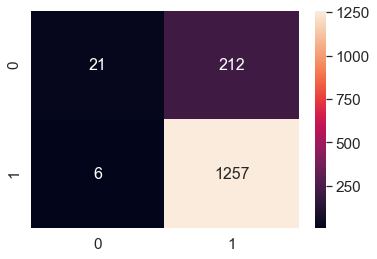

In [37]:
knn = KNeighborsClassifier(optimal_k)
knn.fit(x_tr,Y_train)
y_pred = knn.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## 2. Bi-Grams

In [38]:
bi_vectorizer = CountVectorizer(ngram_range=(1,2))

x_tr = bi_vectorizer.fit_transform(X_train)
x_test = bi_vectorizer.transform(X_test)
x_cv = bi_vectorizer.transform(X_cv)

print(x_tr.shape,Y_train.shape)
print(x_cv.shape,Y_cv.shape)
print(x_test.shape,Y_test.shape)

(3490, 103778) (3490,)
(1496, 103778) (1496,)
(1496, 103778) (1496,)


In [39]:
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
scores = []

for i in neighbors:
    # instantiate learning model (k = 30)
    Knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'kd_tree')
    
    # fitting the model on cross-validation train
    Knn.fit(x_tr,Y_train)
    
    # predict the response on the crossvalidation train
    pred = Knn.predict(x_cv)
    # evaluate CV accuracy
    score = f1_score(Y_cv,pred,average='binary')
    scores.append(score)

MSE = [1 - x for x in scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 21.


### Ploting confusion matrix and finding f1_score given optimal Value of K

Accuracy on test set: 84.626%
Precision on test set: 0.823
Recall on test set: 0.508
F1-Score on test set: 0.475
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



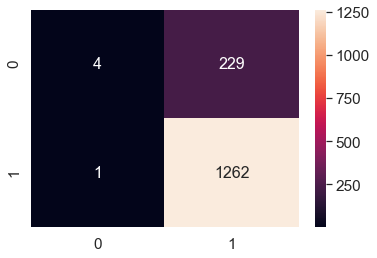

In [40]:
knn = KNeighborsClassifier(optimal_k)
knn.fit(x_tr,Y_train)
y_pred = knn.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## 3. TF-IDF

In [41]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
x_tr = tf_idf_vect.fit_transform(X_train)
x_test = tf_idf_vect.transform(X_test)
x_cv = tf_idf_vect.transform(X_cv)

myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
scores = []

for i in neighbors:
    # instantiate learning model (k = 30)
    Knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'kd_tree')
    
    # fitting the model on cross-validation train
    Knn.fit(x_tr,Y_train)
    
    # predict the response on the crossvalidation train
    pred = Knn.predict(x_cv)
    # evaluate CV accuracy
    score = f1_score(Y_cv,pred,average='binary')
    scores.append(score)

MSE = [1 - x for x in scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 1.


Accuracy on test set: 95.922%
Precision on test set: 0.977
Recall on test set: 0.869
F1-Score on test set: 0.913
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



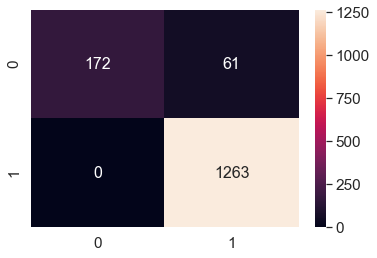

In [42]:
knn = KNeighborsClassifier(optimal_k)
knn.fit(x_tr,Y_train)
y_pred = knn.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## 4. Word2Vec

In [43]:
i=0
list_of_sent=[]
for sent in X_train:
    list_of_sent.append(sent.split())
    
i=0
list_of_sent_cv=[]
for sent in X_cv:
    list_of_sent_cv.append(sent.split())
    
i=0
list_of_sent_test=[]
for sent in X_test:
    list_of_sent_test.append(sent.split())

In [44]:
len(list_of_sent)

3490

In [45]:
w2v_model_train=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [46]:
w2v_words_train = list(w2v_model_train.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_train))
print("sample words ", w2v_words_train[0:50])

number of words that occured minimum 5 times  3150
sample words  ['product', 'simply', 'not', 'windows', 'home', 'premium', 'computer', 'disappointed', 'considering', 'blue', 'website', 'says', 'gave', 'extra', 'star', 'im', 'sure', 'great', 'lack', 'disappointing', 'likely', 'wont', 'buying', 'anything', 'else', 'kettle', 'brand', 'chips', 'used', 'good', 'oily', 'crunchy', 'flavorful', 'suspect', 'company', 'bought', 'recipe', 'changed', 'worse', 'no', 'better', 'big', 'name', 'chip', 'try', 'health', 'style', 'olive', 'oil', 'instead']


In [47]:
w2v_model_cv=Word2Vec(list_of_sent_cv,min_count=5,size=50, workers=4)

In [48]:
w2v_words_cv = list(w2v_model_cv.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_cv))
print("sample words ", w2v_words_cv[0:50])

number of words that occured minimum 5 times  1793
sample words  ['since', 'gluten', 'free', 'tried', 'types', 'gf', 'expensive', 'knew', 'bread', 'lock', 'version', 'cheese', 'probably', 'loved', 'ordering', 'whole', 'lot', 'daughter', 'favorite', 'baby', 'food', 'far', 'ones', 'eat', 'kinds', 'however', 'taste', 'bland', 'adult', 'least', 'put', 'portion', 'fridge', 'may', 'become', 'sort', 'watery', 'point', 'throw', 'unique', 'others', 'combination', 'vegetables', 'especially', 'review', 'today', 'saw', 'little', 'pieces', 'thin']


In [49]:
w2v_model_test=Word2Vec(list_of_sent_test,min_count=5,size=50, workers=4)

In [50]:
w2v_words_test = list(w2v_model_test.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_test))
print("sample words ", w2v_words_test[0:50])

number of words that occured minimum 5 times  1799
sample words  ['thought', 'would', 'try', 'pack', 'see', 'flavor', 'liked', 'best', 'like', 'healthy', 'good', 'ingredients', 'actually', 'smaller', 'packs', 'ordering', 'larger', 'bags', 'love', 'cookies', 'pineapple', 'makes', 'feel', 'vacation', 'drinking', 'pina', 'probably', 'could', 'add', 'little', 'really', 'tastes', 'better', 'coconut', 'tried', 'always', 'fan', 'kettle', 'chips', 'open', 'bag', 'know', 'going', 'get', 'quality', 'no', 'live', 'name', 'package', 'new']


## 5. Avg-W2V

In [51]:
# For Training Set

In [52]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            vec = w2v_model_train.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

3490
50


In [53]:
# For CV set

In [54]:
sent_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_cv: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_cv:
            vec = w2v_model_cv.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
print(len(sent_vectors_cv[0]))

1496
50


In [55]:
# For Test Set

In [56]:
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_test: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_test:
            vec = w2v_model_test.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

1496
50


### Finding Optimal K

In [57]:
x_test=sent_vectors_test
x_cv=sent_vectors_cv
x_tr=sent_vectors

scores=[]
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
scores=[]
for i in neighbors:
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn.fit(x_tr, Y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(sent_vectors_cv)

    # evaluate CV accuracy
    score = f1_score(Y_cv,pred, average='micro')
    scores.append(score)
    
optimal_k=neighbors[scores.index(max(scores))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 11.


### Ploting confusion matrix and finding f1_score given optimal Value of K

Accuracy on test set: 84.091%
Precision on test set: 0.494
Recall on test set: 0.500
F1-Score on test set: 0.461
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



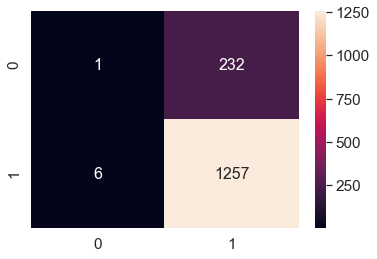

In [58]:
knn = KNeighborsClassifier(optimal_k)
knn.fit(x_tr,Y_train)
y_pred = knn.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

| Model | Optimal K   |F1score test|Accuracy Test
|------|------|------|------|
|  unigram  | 15| 0.541|85.42%|
| Bi-gram | 21|0.475| 84.62%|
|  Tf-IDF | 1| 0.913| 95.92%|
   | Av-Word2Vec | 11| 0.461| 84.09%|